## Merge the data

In [1]:
import os
# used to copy files
import shutil

# define source and target directories
source_dirs = [
    "C:/Users/Administrator/Desktop/Stage_1_Dataset/train",
    "C:/Users/Administrator/Desktop/Stage_1_Dataset/validation",
    "C:/Users/Administrator/Desktop/Stage_1_Dataset/test"
]
target_dir = "C:/Users/Administrator/Desktop/Final Project   2025-1-1/Final Project/Stage_1_Dataset"

# create subdirectories in target directory
false_dir = os.path.join(target_dir, "False")
true_dir = os.path.join(target_dir, "True")
os.makedirs(false_dir, exist_ok=True)
os.makedirs(true_dir, exist_ok=True)

# Iterate over each source directory
for source_dir in source_dirs:
    # List the first level of subdirectories
    for folder_name in os.listdir(source_dir):
        folder_path = os.path.join(source_dir, folder_name)
        
        if os.path.isdir(folder_path):
            # Determine target subdirectory
            if folder_name == "Rice":
                target_sub_dir = true_dir
            else:
                target_sub_dir = false_dir
            
            # Iterate over all files and subdirectories in the folder
            for root, _, files in os.walk(folder_path):
                for file_name in files:
                    file_path = os.path.join(root, file_name)
                    
                    # Copy the file to the target subdirectory
                    if os.path.isfile(file_path):
                        target_file_path = os.path.join(target_sub_dir, file_name)
                        
                        # Check if a file with the same name already exists
                        if os.path.exists(target_file_path):
                            # Rename the file to avoid overwriting
                            base, extension = os.path.splitext(file_name)
                            counter = 1
                            new_file_name = f"{base}_{counter}{extension}"
                            new_target_file_path = os.path.join(target_sub_dir, new_file_name)
                            
                            # Increment the counter until a unique file name is found
                            while os.path.exists(new_target_file_path):
                                counter += 1
                                new_file_name = f"{base}_{counter}{extension}"
                                new_target_file_path = os.path.join(target_sub_dir, new_file_name)
                            
                            shutil.copy(file_path, new_target_file_path)
                        else:
                            shutil.copy(file_path, target_file_path)

print("File merging completed!")

File merging completed!


## Find the duplicate files and remove them

In [2]:
import os
import hashlib

def calculate_file_hash(file_path):
    # Calculate the SHA-256 hash of a file.
    hasher = hashlib.sha256()
    with open(file_path, 'rb') as f:
        buf = f.read()
        hasher.update(buf)
    return hasher.hexdigest()

def find_and_remove_duplicates_in_subfolder(subfolder_path):
    # Find and remove duplicate files in the specified subfolder.
    hash_map = {}
    duplicates = []

    for root, _, files in os.walk(subfolder_path):
        for file in files:
            file_path = os.path.join(root, file)
            file_hash = calculate_file_hash(file_path)

            if file_hash in hash_map:
                # Only remove if the file is not the first occurrence
                if file_path != hash_map[file_hash]:
                    duplicates.append((file_path, hash_map[file_hash]))
                    os.remove(file_path)  # Remove the duplicate file
            else:
                hash_map[file_hash] = file_path

    return duplicates

# Specify the subdirectories to check for duplicates
subfolders = [
    'C:/Users/Administrator/Desktop/Final Project   2025-1-1/Final Project/Stage_1_Dataset/True',
    'C:/Users/Administrator/Desktop/Final Project   2025-1-1/Final Project/Stage_1_Dataset/False'
]

all_duplicates = []

for subfolder in subfolders:
    duplicates = find_and_remove_duplicates_in_subfolder(subfolder)
    all_duplicates.extend(duplicates)

# Print the results
if all_duplicates:
    print(f"Duplicate files found and removed: {len(all_duplicates)} pairs")
    for dup in all_duplicates:
        print(f"Removed duplicate: {dup[0]}")
else:
    print("No duplicate files found.")

Duplicate files found and removed: 14394 pairs
Removed duplicate: C:/Users/Administrator/Desktop/Final Project   2025-1-1/Final Project/Stage_1_Dataset/True\BACTERAILBLIGHT3_084.jpg
Removed duplicate: C:/Users/Administrator/Desktop/Final Project   2025-1-1/Final Project/Stage_1_Dataset/True\BACTERAILBLIGHT3_085.jpg
Removed duplicate: C:/Users/Administrator/Desktop/Final Project   2025-1-1/Final Project/Stage_1_Dataset/True\BACTERAILBLIGHT3_086.jpg
Removed duplicate: C:/Users/Administrator/Desktop/Final Project   2025-1-1/Final Project/Stage_1_Dataset/True\BACTERAILBLIGHT3_087.jpg
Removed duplicate: C:/Users/Administrator/Desktop/Final Project   2025-1-1/Final Project/Stage_1_Dataset/True\BACTERAILBLIGHT3_088.jpg
Removed duplicate: C:/Users/Administrator/Desktop/Final Project   2025-1-1/Final Project/Stage_1_Dataset/True\BACTERAILBLIGHT3_090.jpg
Removed duplicate: C:/Users/Administrator/Desktop/Final Project   2025-1-1/Final Project/Stage_1_Dataset/True\BACTERAILBLIGHT3_091.jpg
Removed 

## Count the number of files in each subfolder

Number of files in C:/Users/Administrator/Desktop/Final Project   2025-1-1/Final Project/Stage_1_Dataset/True: 8333
Number of files in C:/Users/Administrator/Desktop/Final Project   2025-1-1/Final Project/Stage_1_Dataset/False: 36695


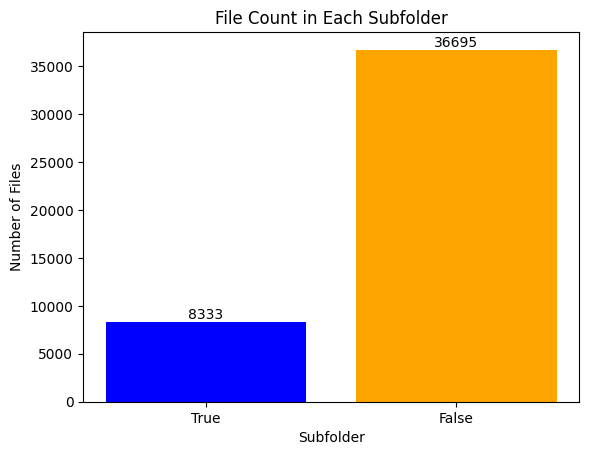

In [3]:
import os
import matplotlib.pyplot as plt

# Specify the subdirectories to check for duplicates
subfolders = [
    'C:/Users/Administrator/Desktop/Final Project   2025-1-1/Final Project/Stage_1_Dataset/True',
    'C:/Users/Administrator/Desktop/Final Project   2025-1-1/Final Project/Stage_1_Dataset/False'
]

# Count files in each subfolder
file_counts = {subfolder: sum(len(files) for _, _, files in os.walk(subfolder)) for subfolder in subfolders}

# Print the file counts
for subfolder, count in file_counts.items():
    print(f"Number of files in {subfolder}: {count}")

# Visualize the file counts
labels = [os.path.basename(subfolder) for subfolder in subfolders]
counts = list(file_counts.values())

plt.bar(labels, counts, color=['blue', 'orange'])
plt.xlabel('Subfolder')
plt.ylabel('Number of Files')
plt.title('File Count in Each Subfolder')

# Add number labels on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

In [4]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import os
import shutil

# Define path of the True and False folders
true_dir = 'C:/Users/Administrator/Desktop/Final Project   2025-1-1/Final Project/Stage_1_Dataset/True'
false_dir = 'C:/Users/Administrator/Desktop/Final Project   2025-1-1/Final Project/Stage_1_Dataset/False'

# Get the file list
true_files = [os.path.join(true_dir, f) for f in os.listdir(true_dir) if os.path.isfile(os.path.join(true_dir, f))]
false_files = [os.path.join(false_dir, f) for f in os.listdir(false_dir) if os.path.isfile(os.path.join(false_dir, f))]

# Create labels
X = true_files + false_files
y = ['True'] * len(true_files) + ['False'] * len(false_files)

# Create and perform undersampling
rus = RandomUnderSampler(random_state=28)
X_res, y_res = rus.fit_resample([[x] for x in X], y)

# Get the file list after undersampling
X_res = [x[0] for x in X_res]

# Move or copy files to a new directory
balanced_true_dir = 'C:/Users/Administrator/Desktop/Final Project   2025-1-1/Final Project/Stage_1_Dataset/balanced/True'
balanced_false_dir = 'C:/Users/Administrator/Desktop/Final Project   2025-1-1/Final Project/Stage_1_Dataset/balanced/False'
os.makedirs(balanced_true_dir, exist_ok=True)
os.makedirs(balanced_false_dir, exist_ok=True)

# Move or copy files to a new directory respectively
for file_path, label in zip(X_res, y_res):
    if label == 'True':
        shutil.copy(file_path, balanced_true_dir)
    else:
        shutil.copy(file_path, balanced_false_dir)

# Print the results
print(f"Original True count: {len(true_files)}, False count: {len(false_files)}")
print(f"Balanced True count: {len(os.listdir(balanced_true_dir))}, False count: {len(os.listdir(balanced_false_dir))}")

# Remove the original True and False directories
shutil.rmtree(true_dir)
shutil.rmtree(false_dir)

print("Original directories removed.")

Original True count: 8333, False count: 36695
Balanced True count: 8333, False count: 8333
Original directories removed.


## Spilt the data to train, validation and test

In [5]:
import os
import shutil
import random

def split_data(source_dir, train_dir, val_dir, test_dir, train_split=0.6, val_split=0.20, test_split=0.20):
    # Iterate over each class directory in the source directory
    for class_name in os.listdir(source_dir):
        # Construct the full path to the class directory
        class_path = os.path.join(source_dir, class_name)
        # Check if the path is a directory
        if os.path.isdir(class_path):
            # List all images in the class directory
            images = os.listdir(class_path)
            # Shuffle the images to ensure random distribution
            random.shuffle(images)
            # Calculate the number of images for each split
            train_count = int(len(images) * train_split)
            val_count = int(len(images) * val_split)

            # Split the images into training, validation, and test sets
            train_images = images[:train_count]
            val_images = images[train_count:train_count + val_count]
            test_images = images[train_count + val_count:]

            # Copy images to the directory
            for image in train_images:
                shutil.copy(os.path.join(class_path, image), os.path.join(train_dir, class_name, image))
            for image in val_images:
                shutil.copy(os.path.join(class_path, image), os.path.join(val_dir, class_name, image))
            for image in test_images:
                shutil.copy(os.path.join(class_path, image), os.path.join(test_dir, class_name, image))

# difine the path
source_dir = 'C:/Users/Administrator/Desktop/Final Project   2025-1-1/Final Project/Stage_1_Dataset/balanced'
train_dir = 'C:/Users/Administrator/Desktop/Final Project   2025-1-1/Final Project/Stage_1_Dataset/train'
val_dir = 'C:/Users/Administrator/Desktop/Final Project   2025-1-1/Final Project/Stage_1_Dataset/validation'
test_dir = 'C:/Users/Administrator/Desktop/Final Project   2025-1-1/Final Project/Stage_1_Dataset/test'

# if the directory does not exist, create it
for dir_path in [train_dir, val_dir, test_dir]:
    os.makedirs(dir_path, exist_ok=True)
    for class_name in os.listdir(source_dir):
        os.makedirs(os.path.join(dir_path, class_name), exist_ok=True)

# split the data
split_data(source_dir, train_dir, val_dir, test_dir)
shutil.rmtree(source_dir)

## Add more noise to the images

In [6]:
import os
import tensorflow as tf

def add_noise_to_image(image, noise_factor):
    # Normalize the image to the range [0, 1]
    image = tf.cast(image, tf.float32) / 255.0
    # Generate Gaussian noise
    noise = tf.random.normal(shape=tf.shape(image), mean=0.0, stddev=noise_factor, dtype=tf.float32)
    # Add the noise to the image
    noisy_image = image + noise
    # Clip pixel values to be within [0, 1]
    noisy_image = tf.clip_by_value(noisy_image, 0.0, 1.0)
    return tf.cast(noisy_image * 255.0, tf.uint8)

def process_and_save_images_with_noise(base_dir, splits, classes, noise_factor):
    for split in splits:
        for cls in classes:
            class_dir = os.path.join(base_dir, split, cls)
            # Check if the directory exists
            if not os.path.exists(class_dir):
                print(f"Directory {class_dir} does not exist, skipping this class.")
                continue
            # Process all image files in the class directory
            for filename in os.listdir(class_dir):
                file_path = os.path.join(class_dir, filename)
                # Read the image file
                image = tf.io.read_file(file_path)
                image = tf.image.decode_jpeg(image, channels=3)
                # Add noise to the image
                noisy_image = add_noise_to_image(image, noise_factor)
                # Save the noisy image, overwriting the original file
                tf.io.write_file(file_path, tf.image.encode_jpeg(noisy_image))

# Dataset path and classes
new_base_dir = 'C:/Users/Administrator/Desktop/Final Project   2025-1-1/Final Project/Stage_1_Dataset'
splits = ['train', 'validation', 'test']
classes = ['True', 'False']

# Add noise to images and save them
process_and_save_images_with_noise(new_base_dir, splits, classes, noise_factor=0.05)